# Demographic view

In this challenge you must analyze demographic data using Pandas. You are given a dataset of demographic data that was extracted from the 1994 Census database.

You must use Pandas to answer the following questions:

How many people of each race are represented in this dataset? This should be a Pandas series with race names as the index labels. (race column)

What is the average age of men?

What is the percentage of people who have a Bachelor's degree?

What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?

What percentage of people without advanced education make more than 50K?

What is the minimum number of hours a person works per week?

What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?

What country has the highest percentage of people that earn >50K and what is that percentage?
Identify the most popular occupation for those who earn >50K in India.

In [3]:
import numpy as np
import pandas as pd

### Obtaining the data

In [4]:
data = pd.read_csv("data.csv")

In [5]:
frame = pd.DataFrame(data)

### Number of races

In [6]:
frameRace = pd.DataFrame(data["race"] )

In [7]:
frameRace.describe()

,race
count,32561
unique,5
top,White
freq,27816


In [8]:
idx = pd.Index(frameRace)

In [9]:
idx.value_counts()

(White,)                 27816
(Black,)                  3124
(Asian-Pac-Islander,)     1039
(Amer-Indian-Eskimo,)      311
(Other,)                   271
dtype: int64

### Male age mean

In [10]:
ageSex = pd.DataFrame(frame, columns = ["age", "sex"])

In [11]:
male = ageSex[ageSex.sex == "Male"]

In [12]:
male.mean()

age    39.433547
dtype: float64

### Percentage of people who have a Bachelor's degree

In [13]:
bachelors = frame[frame.education == "Bachelors" ]

In [14]:
(len(bachelors) / len(frame)) * 100

16.44605509658794

### Percentage of people with advanced education make more than 50K

In [15]:
masters = frame[frame.education == "Masters"]
doctorade = frame[frame.education == "Doctorate"]

In [16]:
education = pd.concat([bachelors, masters, doctorade])

In [17]:
education = education[education.salary == ">50K"]

In [18]:
len(education)/len(frame) * 100

10.706059396210192

###  Without advanced education make more than 50K

In [19]:
basicEdc = frame[frame.education != "Bachelors" ]
basicEdc = basicEdc[basicEdc.education != "Masters"]
basicEdc = basicEdc[basicEdc.education != "Doctorate"]
basicEdc = basicEdc[basicEdc.salary != ">50K"]

In [20]:
len(basicEdc) / len(frame) * 100

63.61905346887381

### Minimum number of hours a person works per week

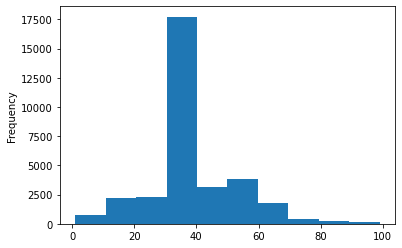

In [21]:
f = frame["hours-per-week"].plot.hist()

In [22]:
f

### Percentage of the people who work the minimum number of hours per week

In [23]:
minH = 0

for i in frame["hours-per-week"]:
    if i == 1:
        minH += 1

In [24]:
infoChart = pd.DataFrame({'min': [minH, len(frame)]},
                  index=['min', 'max'])

In [25]:
infoChart

,min
min,20
max,32561


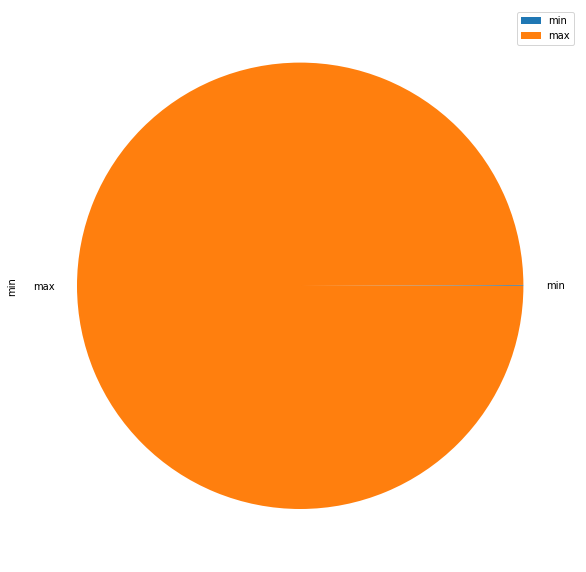

In [26]:
pieChart = infoChart.plot.pie(subplots=True, figsize=(10, 20))

In [27]:
minH

20

### Country has the highest percentage of people that earn >50K and what is that percentage?
### Identify the most popular occupation for those who earn >50K in India.

In [28]:
countrySal = pd.concat([frame["native-country"], frame["salary"]], axis = 1)

In [29]:
countrySal

,native-country,salary
0,United-States,<=50K
1,United-States,<=50K
2,United-States,<=50K
3,United-States,<=50K
4,Cuba,<=50K
...,...,...
32556,United-States,<=50K
32557,United-States,>50K
32558,United-States,<=50K
32559,United-States,<=50K


In [30]:
less50 = countrySal[countrySal.salary == ">50K" ]

In [31]:
less50.describe()

,native-country,salary
count,7841,7841
unique,40,1
top,United-States,>50K
freq,7171,7841


In [32]:
less50["native-country"].unique()

array(['United-States', 'India', '?', 'South', 'Honduras', 'Canada',
       'Iran', 'Mexico', 'Cambodia', 'Thailand', 'Taiwan', 'Portugal',
       'England', 'China', 'Philippines', 'Jamaica', 'Germany', 'Japan',
       'Italy', 'Dominican-Republic', 'Cuba', 'Greece', 'Peru',
       'Guatemala', 'El-Salvador', 'France', 'Vietnam', 'Poland',
       'Puerto-Rico', 'Ireland', 'Yugoslavia', 'Columbia', 'Haiti',
       'Hong', 'Ecuador', 'Nicaragua', 'Trinadad&Tobago', 'Hungary',
       'Scotland', 'Laos'], dtype=object)

In [33]:
less50.count()

native-country    7841
salary            7841
dtype: int64

In [34]:
paises =[]

for i in less50['native-country'].value_counts():
        paises.append(i)
len(paises)

40

In [35]:
infoChart = pd.DataFrame({'cantidad': paises},
                  index=[less50["native-country"].unique()])

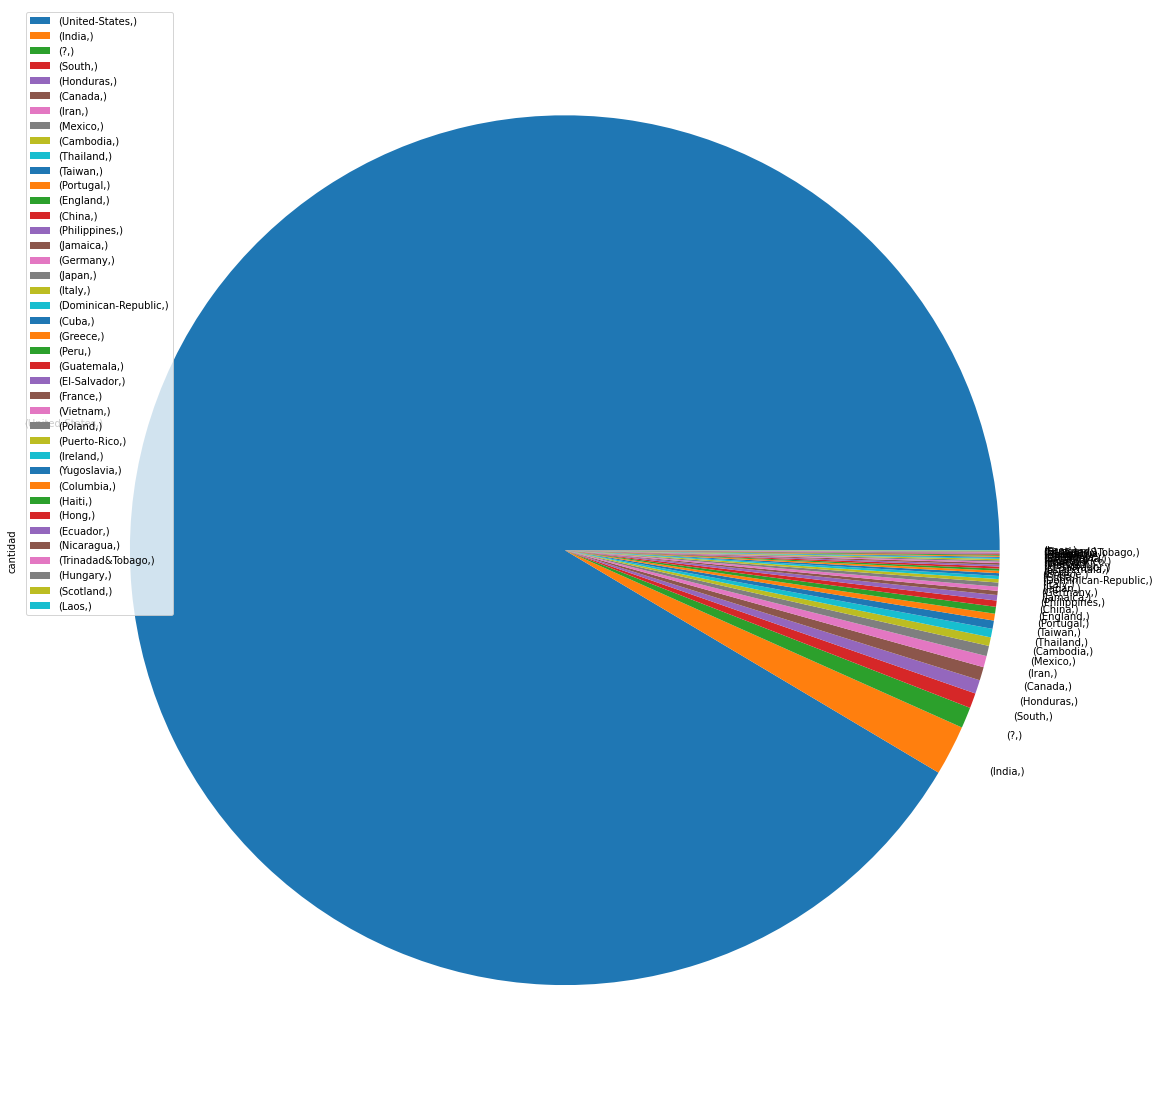

In [36]:
pieChart = infoChart.plot.pie(subplots=True, figsize=(20, 20))

In [59]:
india = pd.concat([frame["native-country"], frame["salary"], frame["occupation"]], axis = 1)

In [60]:
india = india[india["native-country"] == "India" ]
india = india[india.salary == ">50K" ]

In [61]:
india

,native-country,salary,occupation
11,India,>50K,Prof-specialty
968,India,>50K,Exec-managerial
1327,India,>50K,Other-service
7258,India,>50K,Prof-specialty
7285,India,>50K,Prof-specialty
8124,India,>50K,Prof-specialty
9939,India,>50K,Prof-specialty
10590,India,>50K,Prof-specialty
10661,India,>50K,Prof-specialty
10736,India,>50K,Prof-specialty


In [88]:
values=[]
for i in india['occupation'].value_counts():
    values.append(i)

In [93]:
keys = []
for i in india['occupation'].unique():
    keys.append(i)
print(keys)
print(values)

['Prof-specialty', 'Exec-managerial', 'Other-service', 'Tech-support', 'Transport-moving', 'Sales', 'Adm-clerical']
[25, 8, 2, 2, 1, 1, 1]


In [90]:
indiaData = pd.DataFrame({"occupation": keys,"num": values})

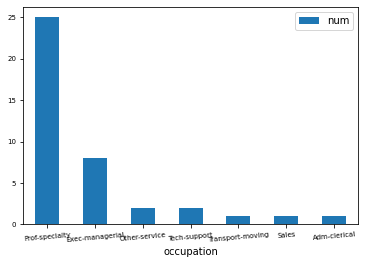

In [106]:
indiaData.plot(x="occupation", y ="num", kind="bar", rot=5, fontsize=7 )